In [26]:
import pandas as pd
import mysql.connector
import numpy as np



In [ ]:
customers = pd.read_csv('C:\\vs\\global\\uncleaned data\\Customers.csv',encoding='unicode_escape')
products = pd.read_csv("C:\\vs\\global\\uncleaned data\\Products.csv", encoding="unicode_escape")
sales = pd.read_csv("C:\\vs\\global\\uncleaned data\\Sales.csv", encoding="unicode_escape")
stores = pd.read_csv("C:\\vs\\global\\uncleaned data\\Stores.csv", encoding="unicode_escape")
exchange_rates = pd.read_csv("C:\\vs\\global\\uncleaned data\\Exchange_Rates.csv", encoding="unicode_escape")



In [ ]:
def clean_data(df):
    # Handle missing values
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    return df

customers = clean_data(customers)
products = clean_data(products)
sales = clean_data(sales)
stores = clean_data(stores)
exchange_rates = clean_data(exchange_rates)

In [ ]:
# Save the cleaned data to a CSV file
customers.to_csv("C:\\vs\\global\\cleaned data\\Customers1.csv", encoding="utf-8", index=False)
sales.to_csv("C:\\vs\\global\\cleaned data\\Sales1.csv", encoding="utf-8", index=False)
products.to_csv("C:\\vs\\global\\cleaned data\\Products1.csv", encoding="utf-8", index=False)
stores.to_csv("C:\\vs\\global\\cleaned data\\Stores1.csv", encoding="utf-8", index=False)
exchange_rates.to_csv("C:\\vs\\global\\cleaned data\\Exchange_rates.csv", encoding="utf-8", index=False)


In [ ]:
# Convert 'Birthday' to datetime format
customers['Birthday'] = pd.to_datetime(customers['Birthday'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

In [ ]:
stores['Open Date'] = pd.to_datetime(stores['Open Date'], format='%m/%d/%Y').dt.strftime('%y-%m-%d')

In [ ]:
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'], format='%m/%d/%Y').dt.strftime('%y-%m-%d')

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y').dt.strftime('%y-%m-%d')
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], format='%m/%d/%Y').dt.strftime('%y-%m-%d')

In [ ]:
# Function to clean and convert currency columns
def clean_currency_column(df, column_name):
    if column_name in df.columns:
        # Remove dollar signs and extra spaces, then convert to numeric
        df[column_name] = df[column_name].replace('[\\$,]', '', regex=True).astype(float)
    return df

# Clean the currency columns in products_df
products = clean_currency_column(products, 'Unit Cost USD')
products = clean_currency_column(products, 'Unit Price USD')

In [ ]:
# Merging dataframes
merged_data = pd.merge(sales, customers, on="CustomerKey")
merged_data = pd.merge(merged_data, products, on="ProductKey")
merged_data = pd.merge(merged_data, stores, on="StoreKey")


In [ ]:
# Converting date columns to datetime format
merged_data["Order Date"] = pd.to_datetime(merged_data["Order Date"])
merged_data["Delivery Date"] = pd.to_datetime(merged_data["Delivery Date"])
merged_data["Birthday"] = pd.to_datetime(merged_data["Birthday"])



In [ ]:
# Handling exchange rates
exchange_rates.info()
exchange_rates["Date"] = pd.to_datetime(exchange_rates["Date"])
print(f"Date: {exchange_rates['Date'].min(), exchange_rates['Date'].max()}")


In [ ]:
# Merging exchange rates with merged data
merged_data = pd.merge(merged_data, exchange_rates, left_on="Order Date", right_on="Date", how="left")


In [ ]:
# Save the merged data to a CSV file
merged_data.to_csv("merged_data.csv", encoding="utf-8", index=False)

In [3]:
merged_data = pd.read_csv("C:\\vs\\global\\merged_data.csv")
merged_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date,Date,Currency,Exchange
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015,2016-01-01,USD,1.0000
1,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015,2016-01-01,CAD,1.3884
2,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015,2016-01-01,AUD,1.3683
3,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015,2016-01-01,EUR,0.9185
4,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015,2016-01-01,GBP,0.6742


In [37]:
merged_data['Currency'].unique()

array(['USD', 'CAD', 'AUD', 'EUR', 'GBP'], dtype=object)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Country&state Distribution

plt.figure(figsize=(8, 6))
sns.histplot(x='Country_x', data=merged_data)
plt.title('Country & state Distribution')
plt.xlabel('Country_x')
plt.ylabel('State_x')
plt.show()

In [4]:
merged_data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
merged_data["Gender"].value_counts()

Gender
Male      159020
Female    155400
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

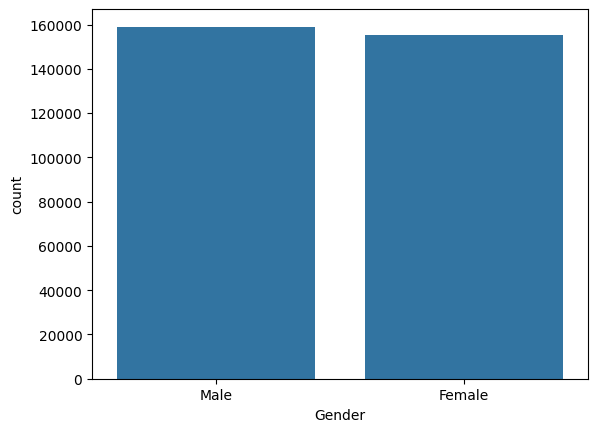

In [8]:
sns.countplot(data = merged_data , x = "Gender")

In [35]:
customers1 = pd.read_csv("C:\\vs\\global\\cleaned data\\Customers1.csv")
customers1.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [ ]:
# Connect to MySQL server
conn = mysql.connector.connect(host="localhost", user="root", password="NISHa1413@@@")

cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS Global_Electronics")
cursor.close()
conn.close()

In [ ]:
# Connect to the new database
conn = mysql.connector.connect(
    host="localhost", user="root", password="NISHa1413@@@", database="Global_Electronics"
)

cursor = conn.cursor()

In [ ]:
create_customers_table_query = '''
        CREATE TABLE IF NOT EXISTS Customers (
            CustomerKey INT PRIMARY KEY,
            Gender VARCHAR(50),
            Name VARCHAR(100),
            City VARCHAR(100),
            State_Code VARCHAR(100),
            State VARCHAR(100),
            Zip_Code VARCHAR(20),
            Country VARCHAR(50),
            Continent VARCHAR(50),
            Birthday DATETIME
        )
        '''
cursor.execute(create_customers_table_query)
for _, row in customers.iterrows():
            insert_customers_query = '''
            INSERT INTO Customers (CustomerKey, Gender, Name, City, State_Code, State, Zip_Code, Country, Continent, Birthday)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
            cursor.execute(insert_customers_query, tuple(row))


In [ ]:
# Create and populate products table
create_products_table_query = '''
        CREATE TABLE IF NOT EXISTS products (
            ProductKey INT PRIMARY KEY,
            Product_Name VARCHAR(100),
            Brand VARCHAR(50),
            Color VARCHAR(20),
            Unit_Cost_USD DECIMAL,
            Unit_Price_USD DECIMAL,
            SubcategoryKey INT,
            Subcategory VARCHAR(100),
            CategoryKey INT,
            Category VARCHAR(100)
        )
        '''
cursor.execute(create_products_table_query)

In [ ]:
for _, row in products.iterrows():
            insert_products_query = '''
            INSERT INTO products (ProductKey, Product_Name, Brand, Color, Unit_Cost_USD, Unit_Price_USD, SubcategoryKey, Subcategory, CategoryKey, Category)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''
            cursor.execute(insert_products_query,tuple(row))

In [ ]:
# Create and populate exchange_rates table
create_exchange_rates_table_query = '''
        CREATE TABLE IF NOT EXISTS exchange_rates (
            Date DATE,
            Currency VARCHAR(10),
            Exchange DECIMAL(10, 4),
            PRIMARY KEY (Date, Currency)
        )
        '''
cursor.execute(create_exchange_rates_table_query)

In [ ]:
for _, row in exchange_rates.iterrows():
            insert_exchange_rates_query = '''
            INSERT INTO exchange_rates (Date, Currency, Exchange)
            VALUES (%s, %s, %s)
            '''
            cursor.execute(insert_exchange_rates_query, tuple(row))

In [67]:
# Create and populate sales table
create_sales_table_query = '''
        CREATE TABLE IF NOT EXISTS sales (
            Order_Number INT,
            Line_Item INT,
            Order_Date DATE,
            Delivery_Date DATE,
            CustomerKey INT,
            StoreKey INT,  -- Not linking with stores table
            ProductKey INT,
            Quantity INT,
            Currency_Code VARCHAR(10),
            PRIMARY KEY (Order_Number, Line_Item),
            FOREIGN KEY (CustomerKey) REFERENCES Customers (CustomerKey),
            FOREIGN KEY (ProductKey) REFERENCES products (ProductKey)
        )
        '''
cursor.execute(create_sales_table_query)


In [ ]:
for _, row in sales.iterrows():
            insert_sales_query = '''
            INSERT INTO sales (Order_Number, Line_Item, Order_Date, Delivery_Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency_Code)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''
cursor.execute(insert_sales_query, tuple(row))

In [ ]:
# Create and populate stores table
create_stores_table_query = '''
        CREATE TABLE IF NOT EXISTS stores (
            StoreKey INT PRIMARY KEY,
            Country VARCHAR(50),
            State VARCHAR(50),
            Square_Meters DECIMAL,
            Open_Date DATE
        )
        '''
cursor.execute(create_stores_table_query)

In [ ]:
for _, row in stores.iterrows():
            insert_stores_query = '''
            INSERT INTO stores (StoreKey, Country, State, Square_Meters, Open_Date)
            VALUES (%s, %s, %s, %s, %s)
            '''
            cursor.execute(insert_stores_query, tuple(row))

In [ ]:
# Get column names and types
columns = merged_data.columns
column_types = []

# Define a mapping from pandas dtype to SQL type
type_mapping = {
    "int64": "INT",
    "float64": "FLOAT",
    "object": "VARCHAR(255)",
    "datetime64[ns]": "DATETIME",
}

# Generate column type definitions
for col in columns:
    dtype = str(merged_data[col].dtype)
    sql_type = type_mapping.get(dtype, "VARCHAR(255)")
    column_types.append(f"`{col}` {sql_type}")

# Create SQL statement for table creation
create_table_query = f"""
CREATE TABLE IF NOT EXISTS Global_Electronics_Table (
    {', '.join(column_types)}
)
"""

cursor.execute(create_table_query)

In [ ]:
# Prepare the INSERT INTO SQL statement
insert_query = f"""
INSERT INTO Global_Electronics_Table ({', '.join([f'`{col}`' for col in columns])})
VALUES ({', '.join(['%s'] * len(columns))})
"""

# Insert the data
for index, row in merged_data.iterrows():
    cursor.execute(insert_query, tuple(row))



In [ ]:
query = '''
        SELECT gender, 
        COUNT(*) AS count 
        FROM Customers 
        GROUP BY gender
        '''
cursor.execute(query)
for table in cursor:
    print(table)

In [ ]:
2.#-- countery wise customer count
query='''
        SELECT continent,Country_x,state_x,city, 
        COUNT(CustomerKey) AS count
        FROM Global_Electronics_Table 
        GROUP BY continent,Country_x,state_x,city
        ORDER BY count DESC'''
cursor.execute(query)
for table in cursor:
   print(table)

In [ ]:
#3. Analyze the distribution of customers based on age
query = '''
        SELECT YEAR(CURDATE()) - YEAR(Birthday) AS age, 
        COUNT(*) AS count 
        FROM Global_Electronics_Table 
        GROUP BY age 
        ORDER BY age
        '''
cursor.execute(query)
for table in cursor:
    print(table)

In [69]:
#4. Query for total sales based on product subcategory
query = '''
    SELECT Subcategory, SUM(Quantity) as total_Sales
    FROM Global_Electronics_Table
    GROUP BY Subcategory
    ORDER BY total_Sales DESC
    LIMIT 5
'''
cursor.execute(query)
for table in cursor:
  print(table)


('Movie DVD', Decimal('144010'))
('Desktops', Decimal('103130'))
('Bluetooth Headphones', Decimal('68265'))
('Download Games', Decimal('57735'))
('Boxed Games', Decimal('55220'))


In [ ]:
#5. view total sales for each product category
query = '''
    SELECT Category, SUM(Quantity) as total_Sales
    FROM Global_Electronics_Table
    GROUP BY Category
    ORDER BY total_Sales DESC
    LIMIT 5
'''
cursor.execute(query)
for table in cursor:
  print(table)


In [ ]:
#6. Query for top 5 countries with high Average sales
query = '''
    SELECT Country_y as Country, AVG(Quantity) as average_Sales
    FROM Global_Electronics_Table
    GROUP BY Country
    ORDER BY average_Sales DESC
    LIMIT 5
'''
cursor.execute(query)
for table in cursor:
  print(table)


In [70]:
#7.Count the brand using the products table
query = '''
        SELECT Brand, 
        COUNT(*) AS count 
        FROM products
        GROUP BY Brand
        '''
cursor.execute(query)
for table in cursor:
    print(table)

('Contoso', 710)
('Wide World Importers', 173)
('Northwind Traders', 47)
('Adventure Works', 192)
('Southridge Video', 192)
('Litware', 264)
('Fabrikam', 267)
('Proseware', 244)
('A. Datum', 132)
('The Phone Company', 152)
('Tailspin Toys', 144)


In [ ]:
#8.Sum of quantity by using productkey
query = '''
    SELECT ProductKey, SUM(Quantity) as total_Sales
    FROM Global_Electronics_Table 
    GROUP BY ProductKey
    ORDER BY total_Sales DESC
'''
cursor.execute(query)
for table in cursor:
    print(table)


In [71]:
#9.Count of category by using color
query = '''
    SELECT Color,  
    COUNT(*) AS count 
    FROM products
    GROUP BY Color
'''
cursor.execute(query)
for table in cursor:
    print(table)

('Silver', 417)
('Blue', 200)
('White', 505)
('Red', 99)
('Black', 602)
('Green', 74)
('Orange', 55)
('Pink', 84)
('Yellow', 36)
('Purple', 6)
('Brown', 77)
('Grey', 283)
('Gold', 50)
('Azure', 14)
('Silver Grey', 14)
('Transparent', 1)


In [79]:
#10.query for top 5 Store sizes with maximum Sale quantity
query = '''
    select `Square Meters`, sum(Quantity) as Total_Sales
    from Global_Electronics_Table
    group by `Square Meters`
    order by Total_Sales desc
    limit 5
'''
cursor.execute(query)
for table in cursor:
    print(table)

(2000.0, Decimal('250760'))
(840.0, Decimal('226485'))
(2100.0, Decimal('54365'))
(1260.0, Decimal('41040'))
(1120.0, Decimal('33065'))
